In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import json



In [3]:
# Load GPS data from gps.json
with open('gps.json', 'r') as f:
    gps_data = json.load(f)
# Extract station data and create DataFrame
df_gps = pd.DataFrame(gps_data['station'])

# Load InSAR data from disp.xlsx
df_satellite = pd.read_excel("disp.xlsx")

# Convert datetime to ordinal values
df_gps['Day_ordinal'] = pd.to_datetime(df_gps['Day']).apply(lambda date: date.toordinal())
df_satellite['Day_ordinal'] = pd.to_datetime(df_satellite['Date']).apply(lambda date: date.toordinal())


In [5]:
import pandas as pd
import json

# Load GPS data from gps.json
with open("gps.json", "r") as f:
    gps_data = json.load(f)

# Convert GPS data to DataFrame
gps_df = pd.DataFrame(gps_data["station"])
gps_df["Day"] = pd.to_datetime(gps_df["Day"])  # Convert to datetime

# Load InSAR displacement data from disp.xlsx
insar_df = pd.read_excel("disp.xlsx")
insar_df.rename(columns={insar_df.columns[0]: "Date", insar_df.columns[1]: "disp"}, inplace=True)
insar_df["Date"] = pd.to_datetime(insar_df["Date"])  # Convert to datetime

# Get the earliest date from InSAR data
start_date = insar_df["Date"].min()

# Filter GPS data to match InSAR date range
filtered_gps_df = gps_df[gps_df["Day"] >= start_date]

# Save the filtered GPS data (optional)
filtered_gps_df.to_csv("filtered_gps.csv", index=False)

# Print first few rows of filtered GPS data
print(filtered_gps_df.head())


            Day    Shift_U
3170 2015-02-20 -88.810628
3171 2015-02-21 -87.921723
3172 2015-02-22 -90.338746
3173 2015-02-23 -89.549718
3174 2015-02-24 -90.288808


In [6]:
import pandas as pd
import json

# Load GPS data from gps.json
with open("gps.json", "r") as f:
    gps_data = json.load(f)

# Convert GPS data to DataFrame
gps_df = pd.DataFrame(gps_data["station"])
gps_df["Day"] = pd.to_datetime(gps_df["Day"])  # Convert to datetime

# Load InSAR displacement data from disp.xlsx
insar_df = pd.read_excel("disp.xlsx")
insar_df.rename(columns={insar_df.columns[0]: "Date", insar_df.columns[1]: "disp"}, inplace=True)
insar_df["Date"] = pd.to_datetime(insar_df["Date"])  # Convert to datetime

# Get the earliest date from InSAR data
start_date = insar_df["Date"].min()

# Filter GPS data to match InSAR date range
filtered_gps_df = gps_df[gps_df["Day"] >= start_date].copy()  # Copy to avoid warnings

# Set the first GPS displacement value as the baseline (zero)
if not filtered_gps_df.empty:
    baseline = filtered_gps_df.iloc[0]["Shift_U"]
    filtered_gps_df["Shift_U"] = filtered_gps_df["Shift_U"] - baseline

# Save the adjusted GPS data (optional)
filtered_gps_df.to_csv("adjusted_gps.csv", index=False)

# Print first few rows of adjusted GPS data
print(filtered_gps_df.head())


            Day   Shift_U
3170 2015-02-20  0.000000
3171 2015-02-21  0.888905
3172 2015-02-22 -1.528118
3173 2015-02-23 -0.739090
3174 2015-02-24 -1.478180


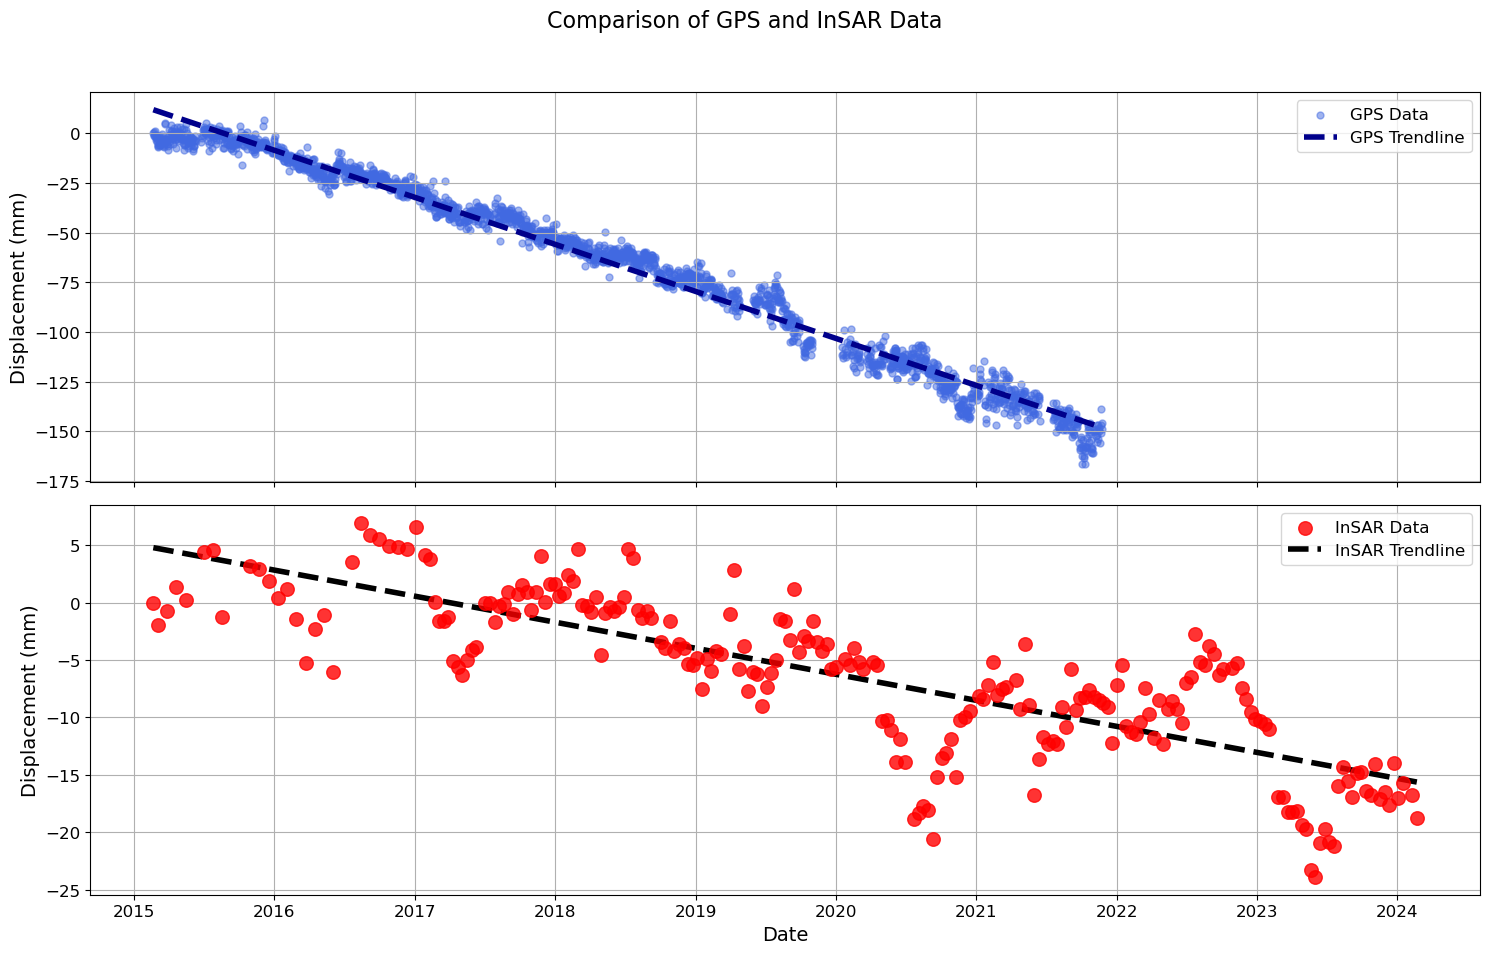

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load adjusted GPS data
df_gps = pd.read_csv("adjusted_gps.csv")
df_gps["Day"] = pd.to_datetime(df_gps["Day"])

# Load InSAR displacement data
df_satellite = pd.read_excel("disp.xlsx")
df_satellite.rename(columns={df_satellite.columns[0]: "Day", df_satellite.columns[1]: "disp"}, inplace=True)
df_satellite["Day"] = pd.to_datetime(df_satellite["Day"])

# Convert datetime to ordinal values for regression
df_gps['Day_ordinal'] = df_gps['Day'].apply(lambda date: date.toordinal())
df_satellite['Day_ordinal'] = df_satellite['Day'].apply(lambda date: date.toordinal())

# Set figure size and create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot GPS data
ax1.scatter(df_gps['Day'], df_gps['Shift_U'], color='royalblue', label='GPS Data', alpha=0.5, s=25)
gps_model = LinearRegression().fit(df_gps[['Day_ordinal']], df_gps['Shift_U'])
gps_trendline = gps_model.predict(df_gps[['Day_ordinal']])
ax1.plot(df_gps['Day'], gps_trendline, color='darkblue', linestyle='--', linewidth=4, label='GPS Trendline')
ax1.set_ylabel('Displacement (mm)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(fontsize=12)
ax1.grid(True)

# Plot InSAR data
ax2.scatter(df_satellite['Day'], df_satellite['disp'], color='red', label='InSAR Data', alpha=0.8, s=95, zorder=100)
satellite_model = LinearRegression().fit(df_satellite[['Day_ordinal']], df_satellite['disp'])
satellite_trendline = satellite_model.predict(df_satellite[['Day_ordinal']])
ax2.plot(df_satellite['Day'], satellite_trendline, color='black', linestyle='--', linewidth=4, label='InSAR Trendline')
ax2.set_ylabel('Displacement (mm)', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(fontsize=12)
ax2.grid(True)

# Add title
plt.suptitle('Comparison of GPS and InSAR Data', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Comparison_of_GPS_and_InSAR_Data.png", dpi=300)

# Show plot
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load adjusted GPS data
df_gps = pd.read_csv("adjusted_gps.csv")
df_gps["Day"] = pd.to_datetime(df_gps["Day"])

# Load InSAR displacement data
df_satellite = pd.read_excel("disp.xlsx")
df_satellite.rename(columns={df_satellite.columns[0]: "Day", df_satellite.columns[1]: "disp"}, inplace=True)
df_satellite["Day"] = pd.to_datetime(df_satellite["Day"])

# Convert datetime to ordinal values for regression
df_gps['Day_ordinal'] = df_gps['Day'].apply(lambda date: date.toordinal())
df_satellite['Day_ordinal'] = df_satellite['Day'].apply(lambda date: date.toordinal())

# Set figure size and create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# Plot GPS data
ax1.scatter(df_gps['Day'], df_gps['Shift_U'], color='royalblue', label='GPS Data', alpha=0.5, s=25)
gps_model = LinearRegression().fit(df_gps[['Day_ordinal']], df_gps['Shift_U'])
gps_trendline = gps_model.predict(df_gps[['Day_ordinal']])
ax1.plot(df_gps['Day'], gps_trendline, color='darkblue', linestyle='--', linewidth=4, label='GPS Trendline')
ax1.set_ylabel('Displacement (mm)', fontsize=14)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.legend(fontsize=12)
ax1.grid(True)

# Plot InSAR data
ax2.scatter(df_satellite['Day'], df_satellite['disp'], color='red', label='InSAR Data', alpha=0.8, s=95, zorder=100)
satellite_model = LinearRegression().fit(df_satellite[['Day_ordinal']], df_satellite['disp'])
satellite_trendline = satellite_model.predict(df_satellite[['Day_ordinal']])
ax2.plot(df_satellite['Day'], satellite_trendline, color='black', linestyle='--', linewidth=4, label='InSAR Trendline')
ax2.set_ylabel('Displacement (mm)', fontsize=14)
ax2.set_xlabel('Date', fontsize=14)
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.legend(fontsize=12)
ax2.grid(True)

# Add title
plt.suptitle('Comparison of GPS and InSAR Data', fontsize=16)

# Adjust layout
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig("Comparison_of_GPS_and_InSAR_Data.png", dpi=300)

# Show plot
plt.show()
